In [35]:
import folium
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
from folium import raster_layers
from geopy.distance import geodesic
from scipy.spatial import cKDTree
from shapely.geometry import Point

city = "Wrocław, Polska"

### Supermarket

In [2]:
tags = {"shop": True}
shops = ox.features.features_from_place(city, tags)
shops

geometry  \
element id                                                              
node    265644030                           POINT (17.01216 51.11333)   
        265644193                            POINT (17.0105 51.11775)   
        265644220                           POINT (17.01522 51.11551)   
        266010556                            POINT (16.98992 51.1252)   
        266010617                           POINT (17.01064 51.11828)   
...                                                               ...   
way     1316453795  POLYGON ((16.99818 51.07007, 16.99821 51.07006...   
        1321673216  POLYGON ((16.95514 51.07812, 16.95519 51.07807...   
        1321691555  POLYGON ((17.09086 51.07106, 17.09115 51.07077...   
        1329966753  POLYGON ((16.99742 51.07696, 16.99772 51.07687...   
        1334668385  POLYGON ((16.88974 51.11221, 16.88974 51.1122,...   

                                shop            name  \
element id                                             
node    265644030        greengrocer             NaN   
        265644193        supermarket  Delikatesy LDC   
        265644220        convenience      Przystanek   
        266010556              kiosk   Warzywniaczek   
        266010617        greengrocer      Warzywniak   
...                              ...             ...   
way     1316453795       greengrocer             NaN   
        1321673216       greengrocer             NaN   
        1321691555  garden_furniture      Miedziński   
        1329966753             tyres             NaN   
        1334668385       supermarket            Lidl   

                                        opening_hours addr:city  \
element id                                                        
node    265644030                                 NaN       NaN   
        265644193                                 NaN       NaN   
        265644220   Mo-Fr 08:00-18:00; Sa 08:00-14:00       NaN   
        266010556                                 NaN       NaN   
        266010617                                 NaN       NaN   
...                                               ...       ...   
way     1316453795                                NaN       NaN   
        1321673216                  Mo-Su 06:00-21:30       NaN   
        1321691555                  Mo-Fr 08:00-16:00       NaN   
        1329966753                                NaN       NaN   
        1334668385                  Mo-Sa 06:00-22:00       NaN   

                   addr:housenumber addr:postcode addr:street description  \
element id                                                                  
node    265644030               NaN           NaN         NaN         NaN   
        265644193               NaN           NaN         NaN         NaN   
        265644220               NaN           NaN         NaN         NaN   
        266010556               NaN           NaN         NaN         NaN   
        266010617               NaN           NaN         NaN         NaN   
...                             ...           ...         ...         ...   
way     1316453795              NaN           NaN         NaN         NaN   
        1321673216              NaN           NaN         NaN         NaN   
        1321691555              NaN           NaN         NaN         NaN   
        1329966753              NaN           NaN         NaN         NaN   
        1334668385              NaN           NaN         NaN         NaN   

                              phone  ... building:levels:underground  \
element id                           ...                               
node    265644030               NaN  ...                         NaN   
        265644193               NaN  ...                         NaN   
        265644220               NaN  ...                         NaN   
        266010556               NaN  ...                         NaN   
        266010617               NaN  ...                         NaN   
... 

In [3]:
unique_shop_types = shops['shop'].unique()
unique_shop_types

array(['greengrocer', 'supermarket', 'convenience', 'kiosk', 'computer',
       'furniture', 'gift', 'alcohol', 'books', 'pet', 'outdoor', 'shoes',
       'electronics', 'hairdresser', 'bicycle', 'optician', 'bakery',
       'vacant', 'copyshop', 'beauty', 'clothes', 'car', 'florist',
       'pastry', 'toys', 'car_repair', 'chemist', 'mall',
       'bathroom_furnishing', 'locksmith', 'doityourself',
       'garden_centre', 'curtain', 'tyres', 'bookmaker', 'wholesale',
       'trade', 'metal', 'car_parts', 'storage_rental', 'lighting',
       'pet_grooming', 'e-cigarette', 'jewelry', 'hearing_aids',
       'butcher', 'hardware', 'paint', 'variety_store', 'health_food',
       'newsagent', 'pawnbroker', 'travel_agency', 'sports', 'general',
       'motorcycle', 'radiotechnics', 'seafood', 'photo', 'cosmetics',
       'games', 'houseware', 'herbalist', 'perfumery', 'photo_studio',
       'nutrition_supplements', 'deli', 'tattoo', 'funeral_directors',
       'appliance', 'frozen_food', 'te

In [4]:
tags = {"shop": "supermarket"}
pois = ox.features.features_from_place(city, tags)
supermarkets = pois[pois['shop'].notnull()]
supermarkets

geometry  \
element id                                                              
node    265644193                            POINT (17.0105 51.11775)   
        436769493                           POINT (17.08286 51.14058)   
        448482831                            POINT (17.0264 51.15124)   
        931903957                           POINT (17.00946 51.09657)   
        962972392                           POINT (17.00693 51.09194)   
...                                                               ...   
way     1128087784  POLYGON ((16.87886 51.12813, 16.87885 51.12808...   
        1223255539  POLYGON ((17.03602 51.09694, 17.03599 51.09666...   
        1223255541  POLYGON ((17.03632 51.09601, 17.03633 51.09613...   
        1249864780  POLYGON ((16.9878 51.11965, 16.98706 51.11912,...   
        1334668385  POLYGON ((16.88974 51.11221, 16.88974 51.1122,...   

                                name         shop addr:city addr:housenumber  \
element id                                                                     
node    265644193     Delikatesy LDC  supermarket       NaN              NaN   
        436769493               Lidl  supermarket   Wrocław          110-118   
        448482831          Biedronka  supermarket       NaN              NaN   
        931903957     Delikatesy T&J  supermarket   Wrocław               42   
        962972392          Biedronka  supermarket       NaN              NaN   
...                              ...          ...       ...              ...   
way     1128087784              Lidl  supermarket   Wrocław               18   
        1223255539         Biedronka  supermarket       NaN              NaN   
        1223255541  Carrefour Market  supermarket       NaN              NaN   
        1249864780         Carrefour  supermarket   Wrocław               58   
        1334668385              Lidl  supermarket       NaN              NaN   

                   addr:postcode             addr:street  \
element id                                                 
node    265644193            NaN                     NaN   
        436769493         51-421  Bolesława Krzywoustego   
        448482831            NaN                     NaN   
        931903957         53-426               Jemiołowa   
        962972392            NaN                     NaN   
...                          ...                     ...   
way     1128087784        54-530               Piołunowa   
        1223255539           NaN                     NaN   
        1223255541           NaN                     NaN   
        1249864780        54-204                Legnicka   
        1334668385           NaN                     NaN   

                                                        opening_hours  \
element id                                                              
node    265644193                                                 NaN   
        436769493   Mo-Th 07:00-21:00, Fr-Sa 07:00-22:00, Su 09:00...   
        448482831                                                24/7   
        931903957                   Mo-Sa 07:00-21:00; Su 09:00-16:00   
        962972392                                                 NaN   
...                                                               ...   
way     1128087784                                                NaN   
        1223255539                                  Mo-Sa 07:00-22:00   
        1223255541                                  Mo-Sa 07:00-22:00   
        1249864780                                  Mo-Sa 07:30-22:00   
        1334668385                                  Mo-Sa 06:00-22:00   

                    start_date             brand  ... payment:nfc  \
element id                                        ...               
node    265644193          NaN               NaN  ...         NaN   
        436769493   2019-09-26               NaN  ...         NaN   
        448482831          NaN         Biedronka  ...         N

In [5]:
# Oddzielenie Point i Polygon
points = supermarkets[supermarkets.geometry.geom_type == 'Point']
polygons = supermarkets[supermarkets.geometry.geom_type == 'Polygon']

# Liczba sklepów Point i Polygon
num_points = len(points)
num_polygons = len(polygons)

# Unikatowe nazwy sklepów
unique_names_points = points['name'].unique()
unique_names_polygons = polygons['name'].unique()

# Zapisanie unikatowych nazw do list
unique_names_points_list = list(unique_names_points)
unique_names_polygons_list = list(unique_names_polygons)

# Wyniki
print(f"Liczba sklepów (Point): {num_points}")
print(f"Liczba sklepów (Polygon): {num_polygons}")
print(f"Unikatowe nazwy sklepów (Point): {unique_names_points_list}")
print(f"Unikatowe nazwy sklepów (Polygon): {unique_names_polygons_list}")


Liczba sklepów (Point): 111
Liczba sklepów (Polygon): 82
Unikatowe nazwy sklepów (Point): ['Delikatesy LDC', 'Lidl', 'Biedronka', 'Delikatesy T&J', 'Społem', 'Kaufland', 'E. Leclerc', 'Ponik', 'Auchan', 'Astra', 'Dino', 'Delikatesy Centrum', 'Stokrotka', 'Carrefour', 'Netto', 'Auchan Supermarket', 'Eurospar', 'Carrefour Market', 'Nowa Chata', 'Supermarket T&J', 'T&J', 'Ukraiński smak', 'Eurocash', 'PSS Społem', 'Rabat', 'Market Spożywczy Pik', 'Lewiatan', 'Aldi']
Unikatowe nazwy sklepów (Polygon): ['Biedronka', 'Lidl', 'Dino', 'Społem', 'Stokrotka', 'Hewea', 'Delikatesy Centrum', 'POLOmarket', 'Aldi', 'Kaufland', 'Eurospar', 'Netto', 'PSS Społem', 'Carrefour Market', 'Carrefour']


In [6]:
def get_coords(row):
    if row.geometry.geom_type == 'Point':
        return (row.geometry.y, row.geometry.x)
    elif row.geometry.geom_type == 'Polygon':
        # Zewnętrzny pierścień
        coords = [(coord[1], coord[0]) for coord in row.geometry.exterior.coords]
        
        # Wewnętrzne pierścienie (jeśli istnieją)
        for interior in row.geometry.interiors:
            coords.extend([(coord[1], coord[0]) for coord in interior.coords])
        return coords
    elif row.geometry.geom_type == 'MultiPolygon':
        # Zewnętrzne pierścienie we wszystkich wielokątach
        coords = []
        for polygon in row.geometry.geoms:
            # Zewnętrzny pierścień
            coords.extend([(coord[1], coord[0]) for coord in polygon.exterior.coords])
            
            # Wewnętrzne pierścienie, jeśli istnieją
            for interior in polygon.interiors:
                coords.extend([(coord[1], coord[0]) for coord in interior.coords])
        return coords
    return None

supermarkets_coords = supermarkets.apply(get_coords, axis=1)
supermarkets_coords = [coord for coord in supermarkets_coords if coord is not None]

shop_coords = []
for sublist in supermarkets_coords:
    if isinstance(sublist, list): 
        for coord in sublist: 
            shop_coords.append(coord)  
    else:  
        shop_coords.append(sublist)

tree = cKDTree(shop_coords)

def get_nearest_distance(lat, lon, flat_coords):
    _, index = tree.query((lat, lon))
    nearest_lat, nearest_lon = flat_coords[index]
    accurate_distance = geodesic((lat, lon), (nearest_lat, nearest_lon)).meters
    return round(accurate_distance, 2)


In [7]:
city_boundary = ox.geocoder.geocode_to_gdf(city)

# Wyodrębnienie granic w formacie polygon
city_polygon = city_boundary.geometry.iloc[0]

In [8]:
# Ekstrakcja współrzędnych minimalnych i maksymalnych
min_lon, min_lat, max_lon, max_lat = city_polygon.bounds

# Definiowanie rozdzielczości siatki
resolution = 0.0005

# Tworzenie siatki
lons = np.arange(min_lon, max_lon, resolution)
lats = np.arange(min_lat, max_lat, resolution)

lons = np.array([round(lon, 5) for lon in lons])
lats = np.array([round(lat, 5) for lat in lats])

# Tworzenie listy par (lon, lat)
grid_points = np.array([(lon, lat) for lon in lons for lat in lats])


In [9]:
# Filtracja punktów wewnątrz miasta
filtered_points = np.array([point for point in grid_points if city_polygon.contains(Point(point))])

In [10]:
# Tworzenie mapy ciepła
heatmap_data = np.array([
    [point[1], point[0], get_nearest_distance(point[1], point[0], shop_coords)]
    for point in filtered_points
])

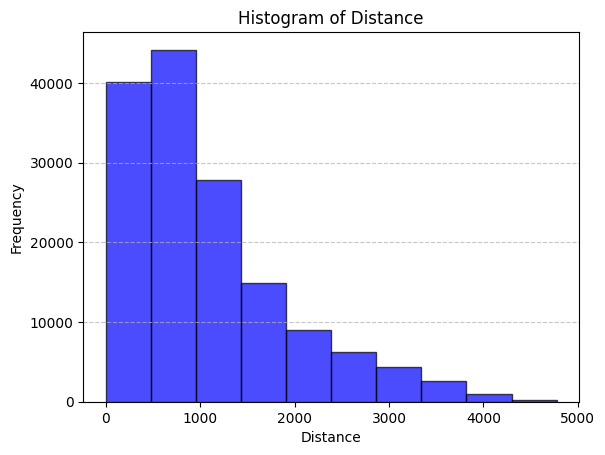

In [11]:
# Wyciągnięcie trzeciej kolumny (distance)
distance_values = np.array([row[2] for row in heatmap_data])

# Tworzenie histogramu
plt.hist(distance_values, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

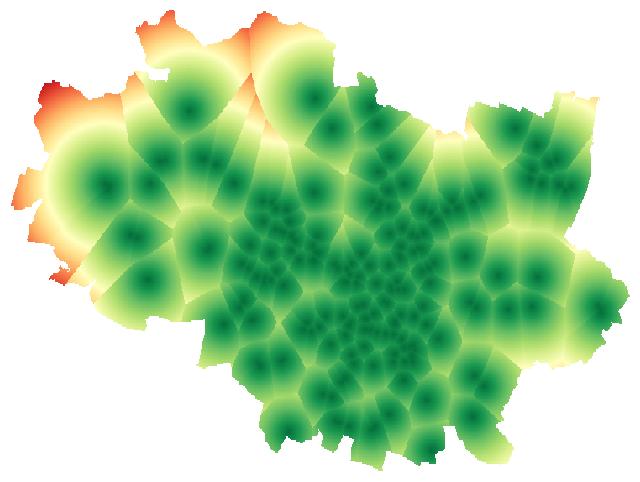

In [12]:
min_val = -100
max_val = 4000

# Przypisanie kolorów z przejściem od zielonego do czerwonego
cmap = plt.get_cmap("RdYlGn_r") 
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)  # Normalizacja do zakresu wartości

# Tworzenie siatki
grid_x, grid_y = lons, lats 
grid_z = np.full((len(grid_y), len(grid_x)), np.nan)  # Siatka na wartości Z (NaN jako brakujące)

# Wypełnianie siatki wartościami Z
for yi, xi, zi in heatmap_data:
    x_idx = np.where(grid_x == xi)[0][0]
    y_idx = np.where(grid_y == yi)[0][0]
    grid_z[y_idx, x_idx] = zi

# Konfiguracja mapy kolorów z białym kolorem dla brakujących wartości
cmap_with_white = mcolors.ListedColormap(['white'] + [cmap(i) for i in range(cmap.N)])

# Tworzenie heatmapy
plt.figure(figsize=(8, 6))
heatmap = plt.pcolormesh(
    grid_x, grid_y, grid_z, cmap=cmap_with_white, norm=norm, shading='auto'
)
plt.axis("off")
plt.savefig("heatmap_shop.png", dpi=300, bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


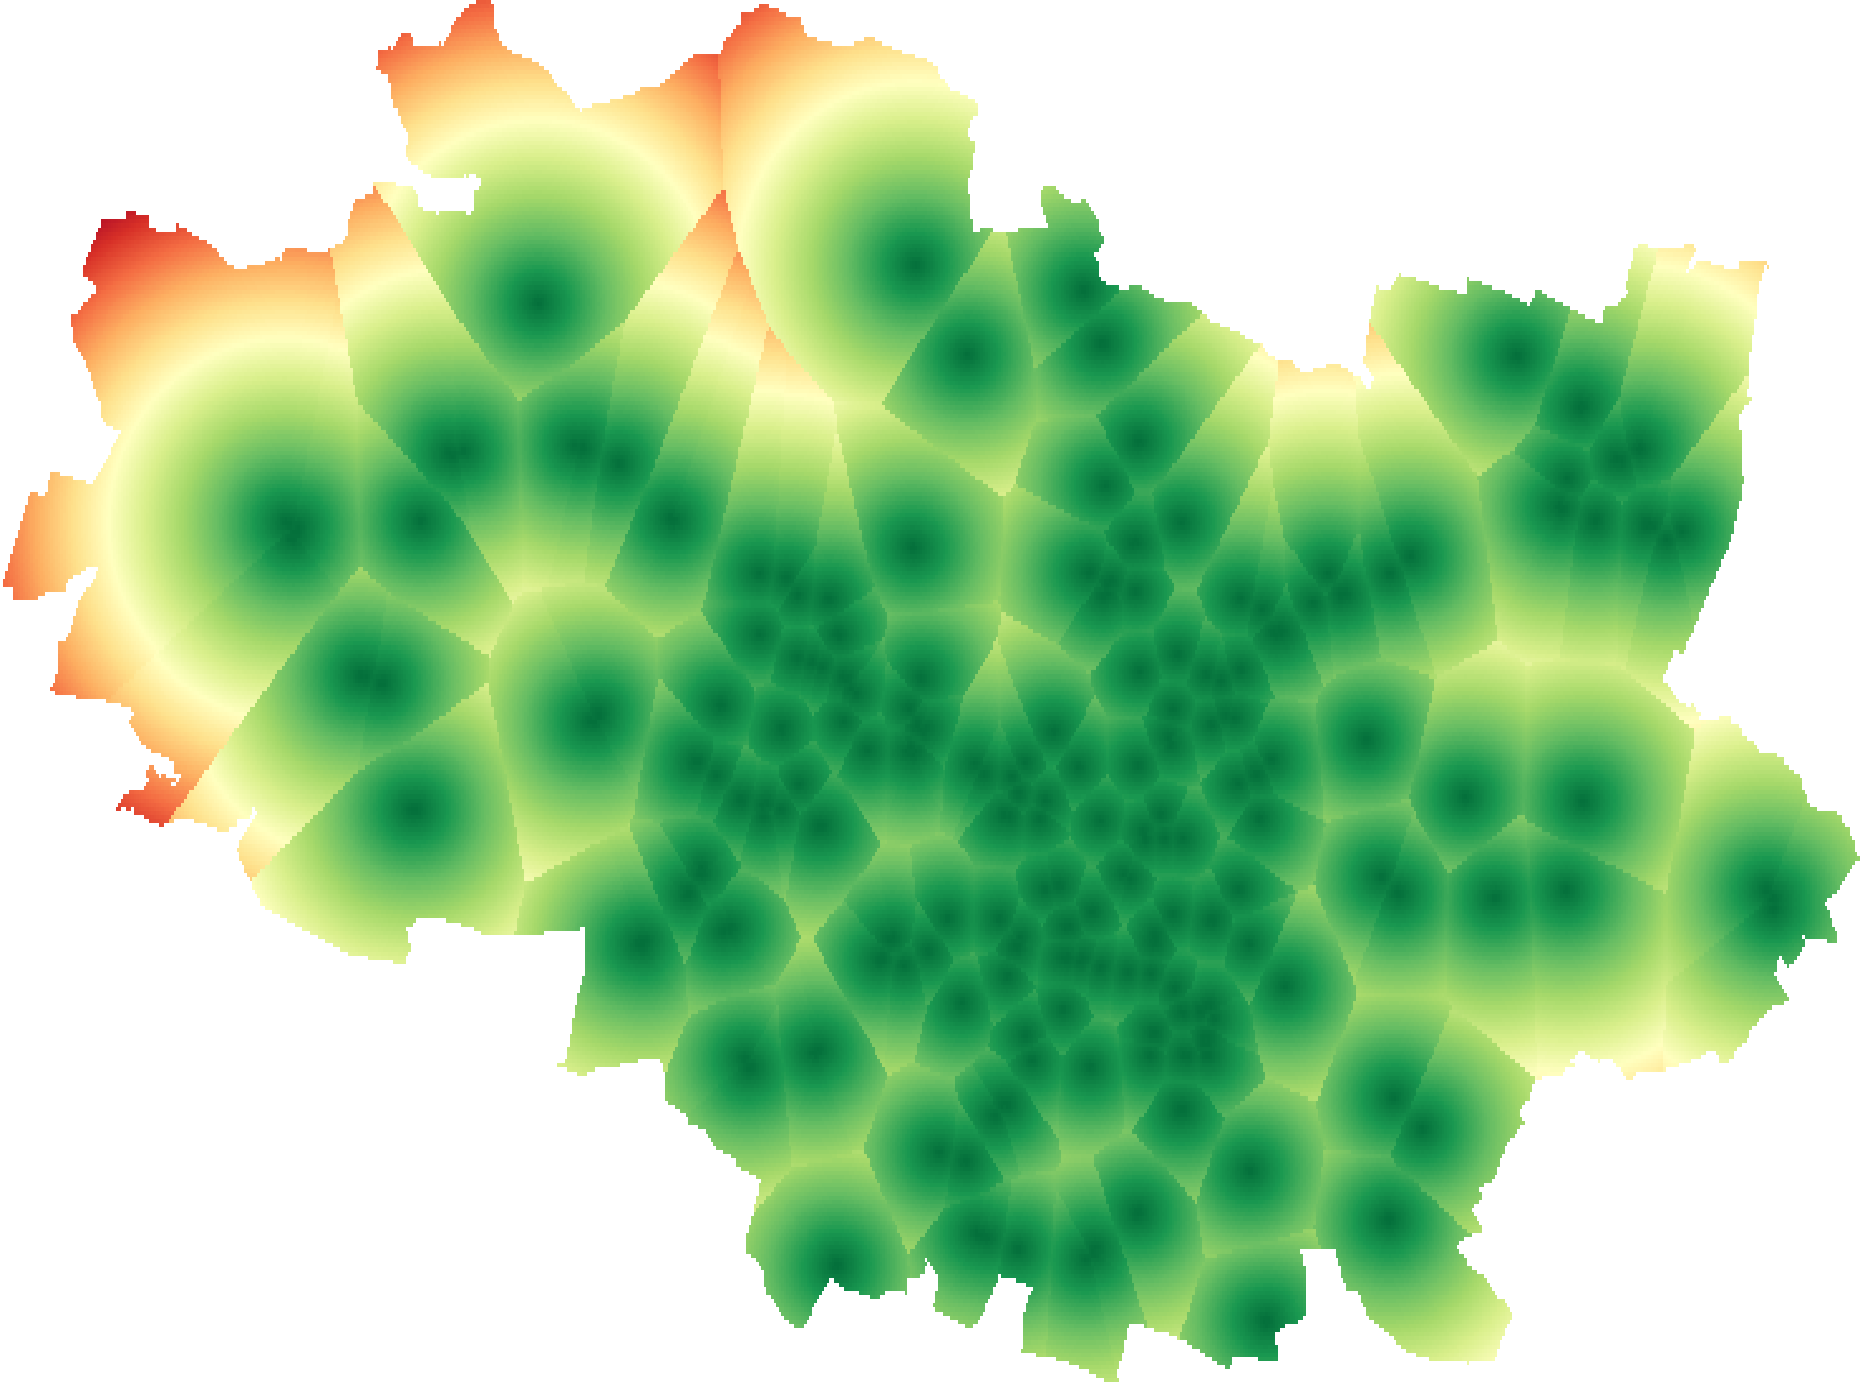

In [13]:
# Dodanie statycznego obrazu do mapy
city_map = folium.Map(location=[(min_lat + max_lat) / 2, (min_lon + max_lon) / 2], zoom_start=12)
image_overlay = raster_layers.ImageOverlay(
    image="heatmap_shop.png",
    bounds=[[min_lat, min_lon], [max_lat, max_lon]], 
    opacity=0.7
)
image_overlay.add_to(city_map)

# Wyświetlanie mapy
city_map


### Przystanki

In [14]:
tags = {
    "public_transport": ["stop_position", "platform"],
    "highway": "bus_stop",
    "railway": ["tram_stop", "station"],
    "amenity": "bus_station"
}
stations = ox.features.features_from_place(city, tags)
stations

geometry  bus  \
element id                                                                   
node    150597415                           POINT (16.97845 51.09409)  yes   
        151334595                            POINT (16.97936 51.0951)  yes   
        155479759                           POINT (17.03795 51.09792)  NaN   
        158719894                           POINT (17.05006 51.10856)  yes   
        158719917                           POINT (17.06256 51.11206)  yes   
...                                                               ...  ...   
way     1063349312  POLYGON ((16.92808 51.13875, 16.92901 51.13864...  NaN   
        1063349313  POLYGON ((16.9281 51.13881, 16.92811 51.13883,...  NaN   
        1174083044  POLYGON ((17.01457 51.11941, 17.01455 51.11939...  NaN   
        1305529473  POLYGON ((17.00465 51.17628, 17.00461 51.17625...  yes   
        1313983467  POLYGON ((17.01462 51.11906, 17.01491 51.11887...  yes   

                                         name public_transport    ref  \
element id                                                              
node    150597415                         FAT    stop_position  11712   
        151334595                         FAT    stop_position  11707   
        155479759              Wrocław Główny          station    NaN   
        158719894   Urząd Wojewódzki (Impart)    stop_position  20301   
        158719917            Plac Grunwaldzki    stop_position  20921   
...                                       ...              ...    ...   
way     1063349312                        NaN         platform    NaN   
        1063349313                        NaN         platform    NaN   
        1174083044                        NaN         platform    NaN   
        1305529473                        NaN         platform    NaN   
        1313983467                        NaN         platform    NaN   

                                                             alt_name  \
element id                                                              
node    150597415                                                 NaN   
        151334595                                                 NaN   
        155479759   Wrocław Główny Osobowy;Dworzec PKP Wrocław Główny   
        158719894                                                 NaN   
        158719917                                                 NaN   
...                                                               ...   
way     1063349312                                                NaN   
        1063349313                                                NaN   
        1174083044                                                NaN   
        1305529473                                                NaN   
        1313983467                                                NaN   

                                            network  \
element id                                            
node    150597415                               NaN   
        151334595                               NaN   
        155479759   PKP Polskie Linie Kolejowe S.A.   
        158719894                               NaN   
        158719917                               NaN   
...                                             ...   
way     1063349312                              NaN   
        1063349313                              NaN   
        1174083044                              NaN   
        1305529473                              NaN   
        1313983467                              NaN   

                                           operator   railway railway:ref  \
element id                                                                  
node    150597415                               NaN       NaN         NaN   
        151334595                               NaN       NaN         NaN   
        155479759   PKP Polskie Linie Kolejowe S.A.   station          WG   
        158719894                            

In [15]:
unique_stations_types = stations['public_transport'].unique()
unique_stations_types

array(['stop_position', 'station', 'platform', nan], dtype=object)

In [16]:
stations_coords = stations.apply(get_coords, axis=1)
stations_coords = [coord for coord in stations_coords if coord is not None]

stat_coords = []
for sublist in stations_coords:
    if isinstance(sublist, list): 
        for coord in sublist: 
            stat_coords.append(coord)  
    else:  
        stat_coords.append(sublist)

tree = cKDTree(stat_coords)

In [17]:
# Tworzenie mapy ciepła
heatmap_data = np.array([
    [point[1], point[0], get_nearest_distance(point[1], point[0], stat_coords)]
    for point in filtered_points
])

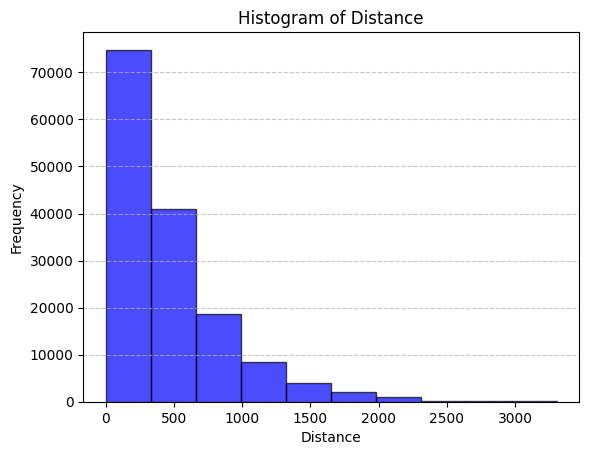

In [18]:
# Wyciągnięcie trzeciej kolumny (distance)
distance_values = np.array([row[2] for row in heatmap_data])

# Tworzenie histogramu
plt.hist(distance_values, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

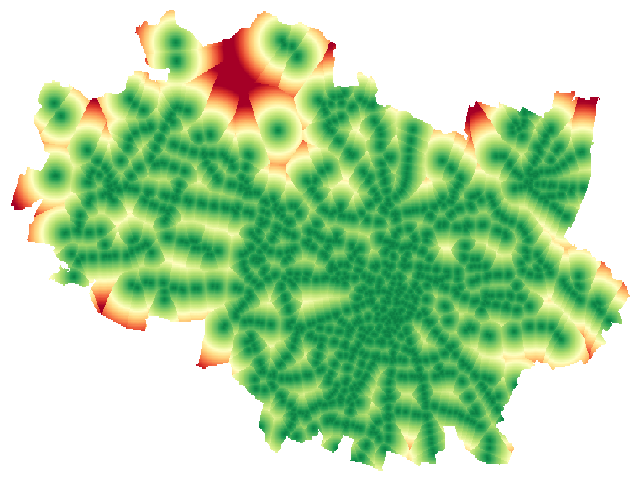

In [19]:
min_val = -100
max_val = 2000

# Przypisanie kolorów z przejściem od zielonego do czerwonego
cmap = plt.get_cmap("RdYlGn_r") 
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)  # Normalizacja do zakresu wartości

# Tworzenie siatki
grid_x, grid_y = lons, lats 
grid_z = np.full((len(grid_y), len(grid_x)), np.nan)  # Siatka na wartości Z (NaN jako brakujące)

# Wypełnianie siatki wartościami Z
for yi, xi, zi in heatmap_data:
    x_idx = np.where(grid_x == xi)[0][0]
    y_idx = np.where(grid_y == yi)[0][0]
    grid_z[y_idx, x_idx] = zi

# Konfiguracja mapy kolorów z białym kolorem dla brakujących wartości
cmap_with_white = mcolors.ListedColormap(['white'] + [cmap(i) for i in range(cmap.N)])

# Tworzenie heatmapy
plt.figure(figsize=(8, 6))
heatmap = plt.pcolormesh(
    grid_x, grid_y, grid_z, cmap=cmap_with_white, norm=norm, shading='auto'
)
plt.axis("off")
plt.savefig("heatmap_station.png", dpi=300, bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


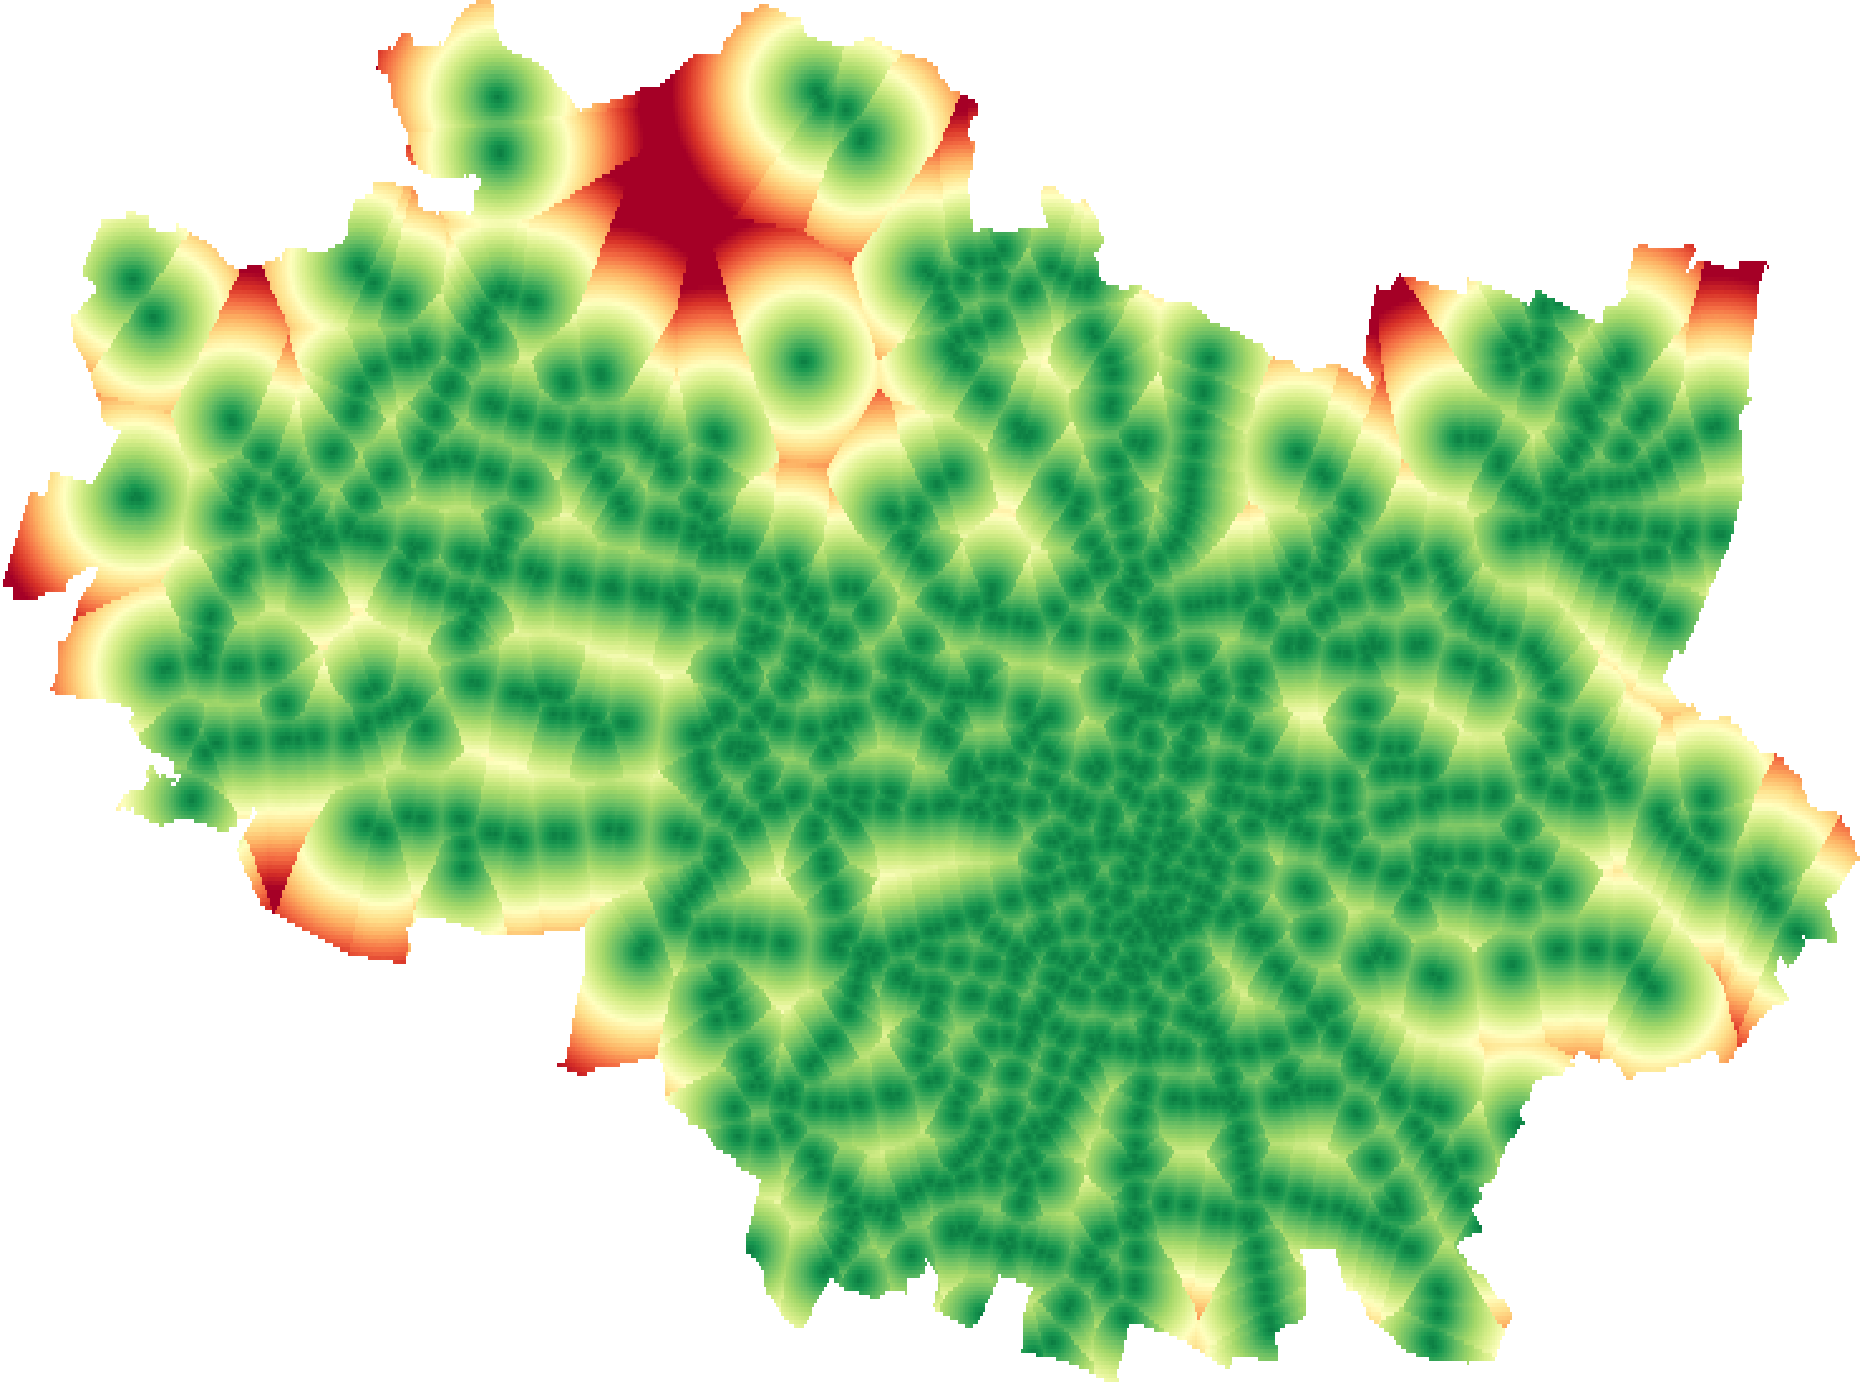

In [20]:
# Dodanie statycznego obrazu do mapy
city_map = folium.Map(location=[(min_lat + max_lat) / 2, (min_lon + max_lon) / 2], zoom_start=12)
image_overlay = raster_layers.ImageOverlay(
    image="heatmap_station.png",
    bounds=[[min_lat, min_lon], [max_lat, max_lon]], 
    opacity=0.7
)
image_overlay.add_to(city_map)

# Wyświetlanie mapy
city_map


### Szpitale

In [21]:
# Tag dla szpitali
tags = {
    "amenity": ["hospital", "clinic"],
    "healthcare": "clinic"
}

# Pobranie danych o szpitalach w wybranym mieście
hospitals = ox.features.features_from_place(city, tags)
hospitals

geometry  \
element id                                                              
node    1200510982                          POINT (17.05701 51.11468)   
        1201302923                          POINT (17.05129 51.10321)   
        1420247375                          POINT (17.06082 51.12614)   
        2714944929                           POINT (17.02605 51.1414)   
        3133938850                          POINT (17.06723 51.11003)   
...                                                               ...   
way     1075701830  POLYGON ((17.03642 51.10927, 17.03647 51.10933...   
        1091229190  POLYGON ((16.96887 51.08307, 16.96888 51.08324...   
        1101515566  POLYGON ((17.06849 51.11217, 17.06843 51.11257...   
        1105745232  POLYGON ((17.05353 51.12295, 17.05347 51.12287...   
        1134653887  POLYGON ((17.0233 51.10566, 17.02316 51.10572,...   

                   addr:city addr:country addr:housenumber addr:postcode  \
element id                                                                 
node    1200510982   Wrocław           PL               20        50-353   
        1201302923   Wrocław          NaN            72/U2        50-418   
        1420247375       NaN          NaN              NaN           NaN   
        2714944929   Wrocław          NaN                2        51-114   
        3133938850       NaN          NaN              NaN           NaN   
...                      ...          ...              ...           ...   
way     1075701830       NaN          NaN              NaN           NaN   
        1091229190       NaN          NaN              NaN           NaN   
        1101515566       NaN          NaN              NaN           NaN   
        1105745232       NaN          NaN              NaN           NaN   
        1134653887       NaN          NaN              NaN           NaN   

                                    addr:street addr:street:sym_ul amenity  \
element id                                                                   
node    1200510982                  Grunwaldzka              06260  clinic   
        1201302923  Generała Romualda Traugutta                NaN  clinic   
        1420247375                          NaN                NaN  clinic   
        2714944929                   Bezpieczna                NaN  clinic   
        3133938850                          NaN                NaN  clinic   
...                                         ...                ...     ...   
way     1075701830                          NaN                NaN  clinic   
        1091229190                          NaN                NaN  clinic   
        1101515566                          NaN                NaN  clinic   
        1105745232                          NaN                NaN  clinic   
        1134653887                          NaN                NaN  clinic   

                       contact:facebook contact:instagram  ... loc_name  \
element id                                                 ...            
node    1200510982  poradniapsychomedic    psychomedic.pl  ...      NaN   
        1201302923                  NaN               NaN  ...      NaN   
        1420247375                  NaN               NaN  ...      NaN   
        2714944929                  NaN               NaN  ...      NaN   
        3133938850                  NaN               NaN  ...      NaN   
...                                 ...               ...  ...      ...   
way     1075701830                  NaN               NaN  ...      NaN   
        1091229190                  NaN               NaN  ...      NaN   
        1101515566                  NaN               NaN  ...      NaN   
        1105745232                  NaN               NaN  ...      NaN   
        1134653887                  NaN               NaN  ...      NaN   

                   note:name barrier  url alt_name note full_name  ref  \
element id                                               

In [ ]:
hospitals_coords = hospitals.apply(get_coords, axis=1)
hospitals_coords = [coord for coord in hospitals_coords if coord is not None]

hosp_coords = []
for sublist in hospitals_coords:
    if isinstance(sublist, list): 
        for coord in sublist: 
            hosp_coords.append(coord)  
    else:  
        hosp_coords.append(sublist)

tree = cKDTree(hosp_coords)

In [23]:
# Tworzenie mapy ciepła
heatmap_data = np.array([
    [point[1], point[0], get_nearest_distance(point[1], point[0], hosp_coords)]
    for point in filtered_points
])

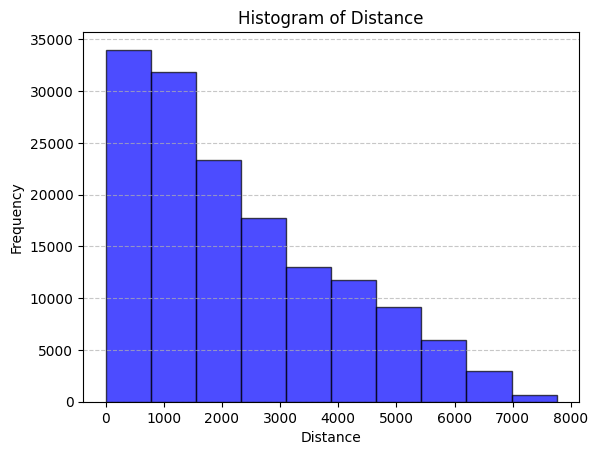

In [24]:
# Wyciągnięcie trzeciej kolumny (distance)
distance_values = np.array([row[2] for row in heatmap_data])

# Tworzenie histogramu
plt.hist(distance_values, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

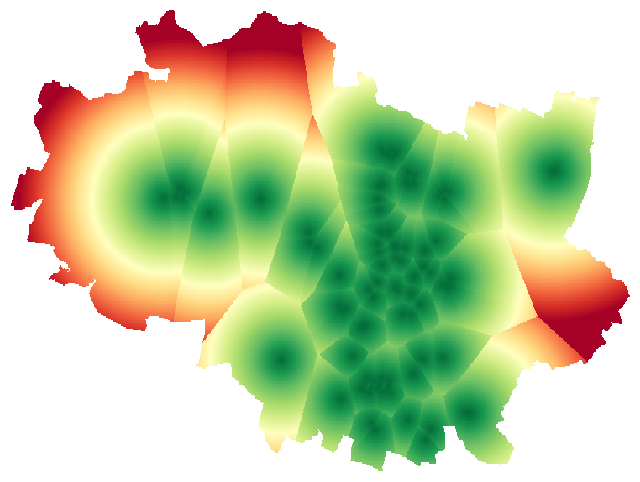

In [25]:
min_val = -100
max_val = 6000

# Przypisanie kolorów z przejściem od zielonego do czerwonego
cmap = plt.get_cmap("RdYlGn_r") 
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)  # Normalizacja do zakresu wartości

# Tworzenie siatki
grid_x, grid_y = lons, lats 
grid_z = np.full((len(grid_y), len(grid_x)), np.nan)  # Siatka na wartości Z (NaN jako brakujące)

# Wypełnianie siatki wartościami Z
for yi, xi, zi in heatmap_data:
    x_idx = np.where(grid_x == xi)[0][0]
    y_idx = np.where(grid_y == yi)[0][0]
    grid_z[y_idx, x_idx] = zi

# Konfiguracja mapy kolorów z białym kolorem dla brakujących wartości
cmap_with_white = mcolors.ListedColormap(['white'] + [cmap(i) for i in range(cmap.N)])

# Tworzenie heatmapy
plt.figure(figsize=(8, 6))
heatmap = plt.pcolormesh(
    grid_x, grid_y, grid_z, cmap=cmap_with_white, norm=norm, shading='auto'
)
plt.axis("off")
plt.savefig("heatmap_hospital.png", dpi=300, bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()

### Parki

In [26]:
tags = {
    "leisure": ["park", "nature_reserve", "garden"],
    "landuse": ["recreation_ground", "forest", "grassland"],
    "boundary": "national_park"
}

parks = ox.features.features_from_place(city, tags)
parks

geometry  \
element  id                                                              
relation 62128       POLYGON ((16.97989 51.15268, 16.97986 51.15271...   
         896155      MULTIPOLYGON (((17.07922 51.14923, 17.07903 51...   
         1348101     POLYGON ((17.07422 51.08476, 17.07431 51.08479...   
         2519767     MULTIPOLYGON (((16.97307 51.204, 16.97333 51.2...   
         2950476     MULTIPOLYGON (((16.86673 51.15565, 16.86711 51...   
...                                                                ...   
way      1319953069  POLYGON ((16.98588 51.07716, 16.9859 51.07714,...   
         1320420245  POLYGON ((16.94538 51.10385, 16.94556 51.10381...   
         1321598201  POLYGON ((17.1749 51.10755, 17.17503 51.10759,...   
         1326200955  POLYGON ((16.99549 51.08847, 16.99548 51.08848...   
         1326200961  POLYGON ((16.99531 51.08836, 16.99534 51.08817...   

                    leisure              name name:etymology:wikidata  \
element  id                                                             
relation 62128          NaN    Las Osobowicki                     NaN   
         896155         NaN  Las Sołtysowicki                     NaN   
         1348101       park     Park Wschodni                     NaN   
         2519767        NaN               NaN                     NaN   
         2950476        NaN    Las Mokrzański                     NaN   
...                     ...               ...                     ...   
way      1319953069     NaN               NaN                     NaN   
         1320420245    park               NaN                     NaN   
         1321598201     NaN               NaN                     NaN   
         1326200955     NaN               NaN                     NaN   
         1326200961     NaN               NaN                     NaN   

                    short_name            landuse area   wikidata  \
element  id                                                         
relation 62128             NaN             forest  NaN        NaN   
         896155            NaN             forest  NaN  Q11752960   
         1348101           NaN                NaN  NaN  Q11811539   
         2519767           NaN             forest  NaN        NaN   
         2950476           NaN             forest  NaN        NaN   
...                        ...                ...  ...        ...   
way      1319953069        NaN  recreation_ground  NaN        NaN   
         1320420245        NaN                NaN  NaN        NaN   
         1321598201        NaN             forest  NaN        NaN   
         1326200955        NaN  recreation_ground  NaN        NaN   
         1326200961        NaN  recreation_ground  NaN        NaN   

                               wikipedia local_name  ... source:old_name  bbq  \
element  id                                          ...                        
relation 62128                       NaN        NaN  ...             NaN  NaN   
         896155      pl:Las Sołtysowicki        NaN  ...             NaN  NaN   
         1348101        pl:Park Wschodni        NaN  ...             NaN  NaN   
         2519767                     NaN        NaN  ...             NaN  NaN   
         2950476                     NaN        NaN  ...             NaN  NaN   
...                                  ...        ...  ...             ...  ...   
way      1319953069                  NaN        NaN  ...             NaN  NaN   
         1320420245                  NaN        NaN  ...             NaN  NaN   
         1321598201                  NaN        NaN  ...             NaN  NaN   
         1326200955                  NaN        NaN  ...             NaN  NaN   
         1326200961                  NaN        NaN  ...             NaN  NaN   

                    check_date name:prefix foot outdoor          type  \
element  id                                                             
relation 62128             NaN         NaN  NaN    

In [27]:
parks_coords = parks.apply(get_coords, axis=1)
parks_coords = [coord for coord in parks_coords if coord is not None]

p_coords = []
for sublist in parks_coords:
    if isinstance(sublist, list): 
        for coord in sublist: 
            p_coords.append(coord)  
    else:  
        p_coords.append(sublist)

tree = cKDTree(p_coords)

In [28]:
# Tworzenie mapy ciepła
heatmap_data = np.array([
    [point[1], point[0], get_nearest_distance(point[1], point[0], p_coords)]
    for point in filtered_points
])

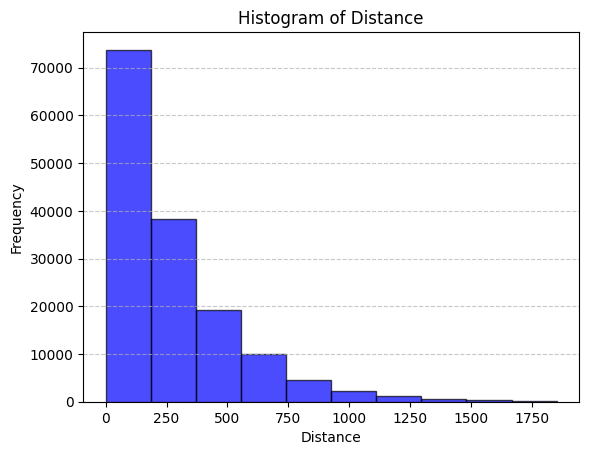

In [29]:
# Wyciągnięcie trzeciej kolumny (distance)
distance_values = np.array([row[2] for row in heatmap_data])

# Tworzenie histogramu
plt.hist(distance_values, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

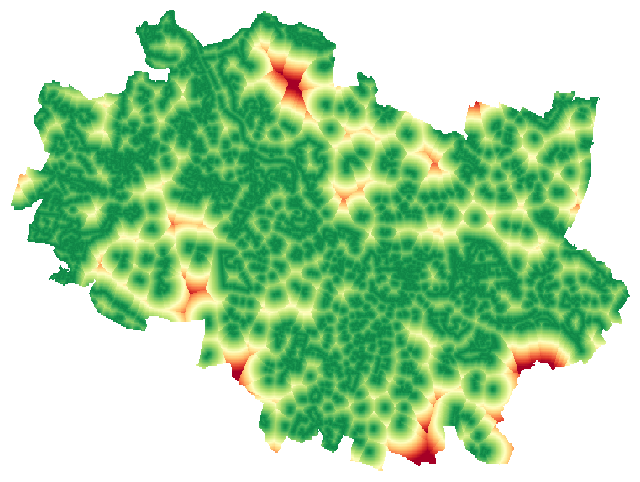

In [30]:
min_val = -100
max_val = 1500

# Przypisanie kolorów z przejściem od zielonego do czerwonego
cmap = plt.get_cmap("RdYlGn_r") 
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)  # Normalizacja do zakresu wartości

# Tworzenie siatki
grid_x, grid_y = lons, lats 
grid_z = np.full((len(grid_y), len(grid_x)), np.nan)  # Siatka na wartości Z (NaN jako brakujące)

# Wypełnianie siatki wartościami Z
for yi, xi, zi in heatmap_data:
    x_idx = np.where(grid_x == xi)[0][0]
    y_idx = np.where(grid_y == yi)[0][0]
    grid_z[y_idx, x_idx] = zi

# Konfiguracja mapy kolorów z białym kolorem dla brakujących wartości
cmap_with_white = mcolors.ListedColormap(['white'] + [cmap(i) for i in range(cmap.N)])

# Tworzenie heatmapy
plt.figure(figsize=(8, 6))
heatmap = plt.pcolormesh(
    grid_x, grid_y, grid_z, cmap=cmap_with_white, norm=norm, shading='auto'
)
plt.axis("off")
plt.savefig("heatmap_park.png", dpi=300, bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()

### Nałożenie map ciepła na siebie


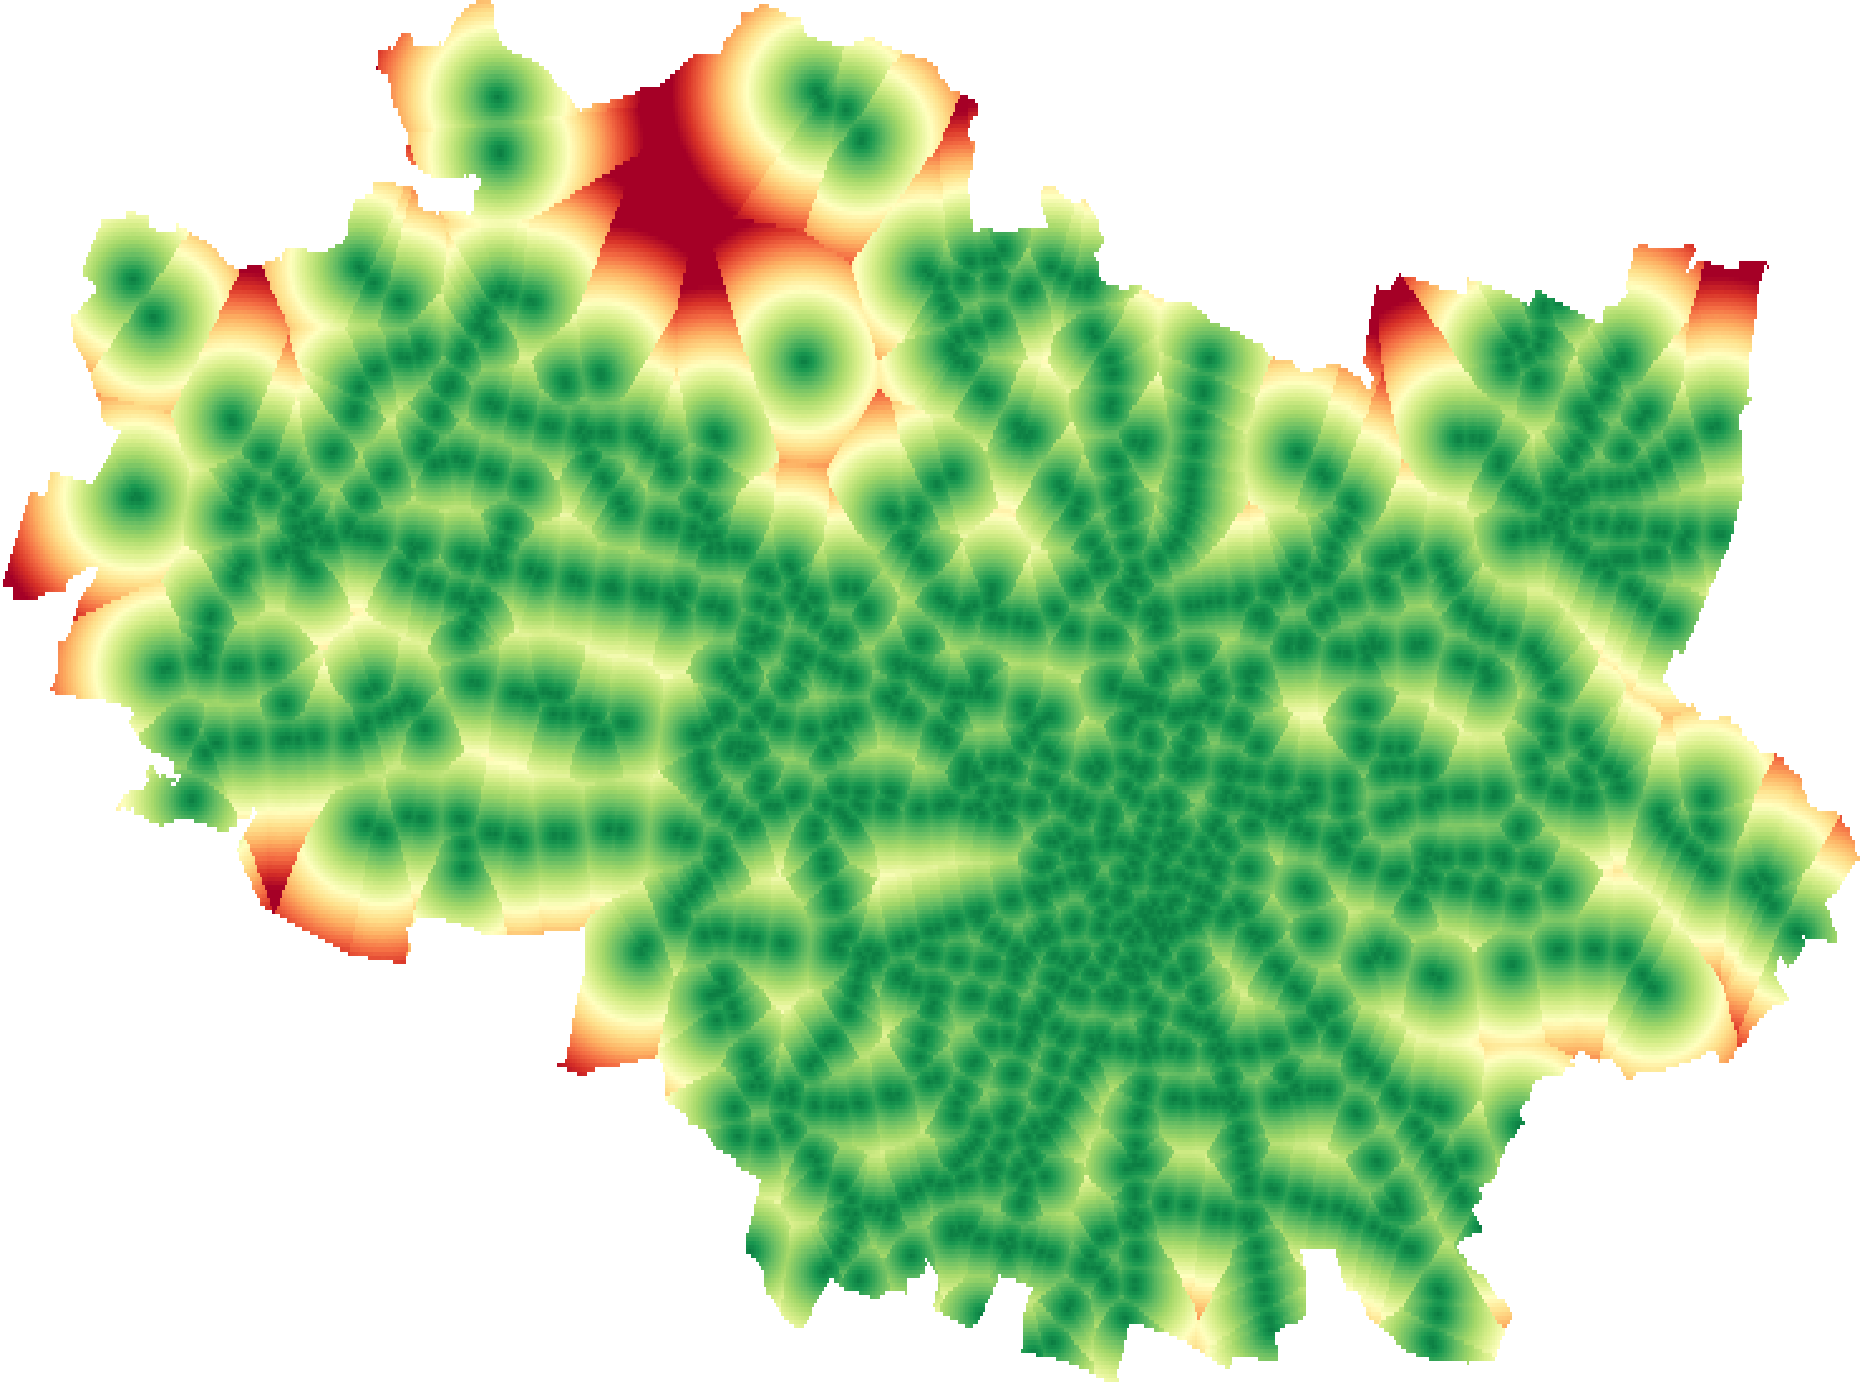
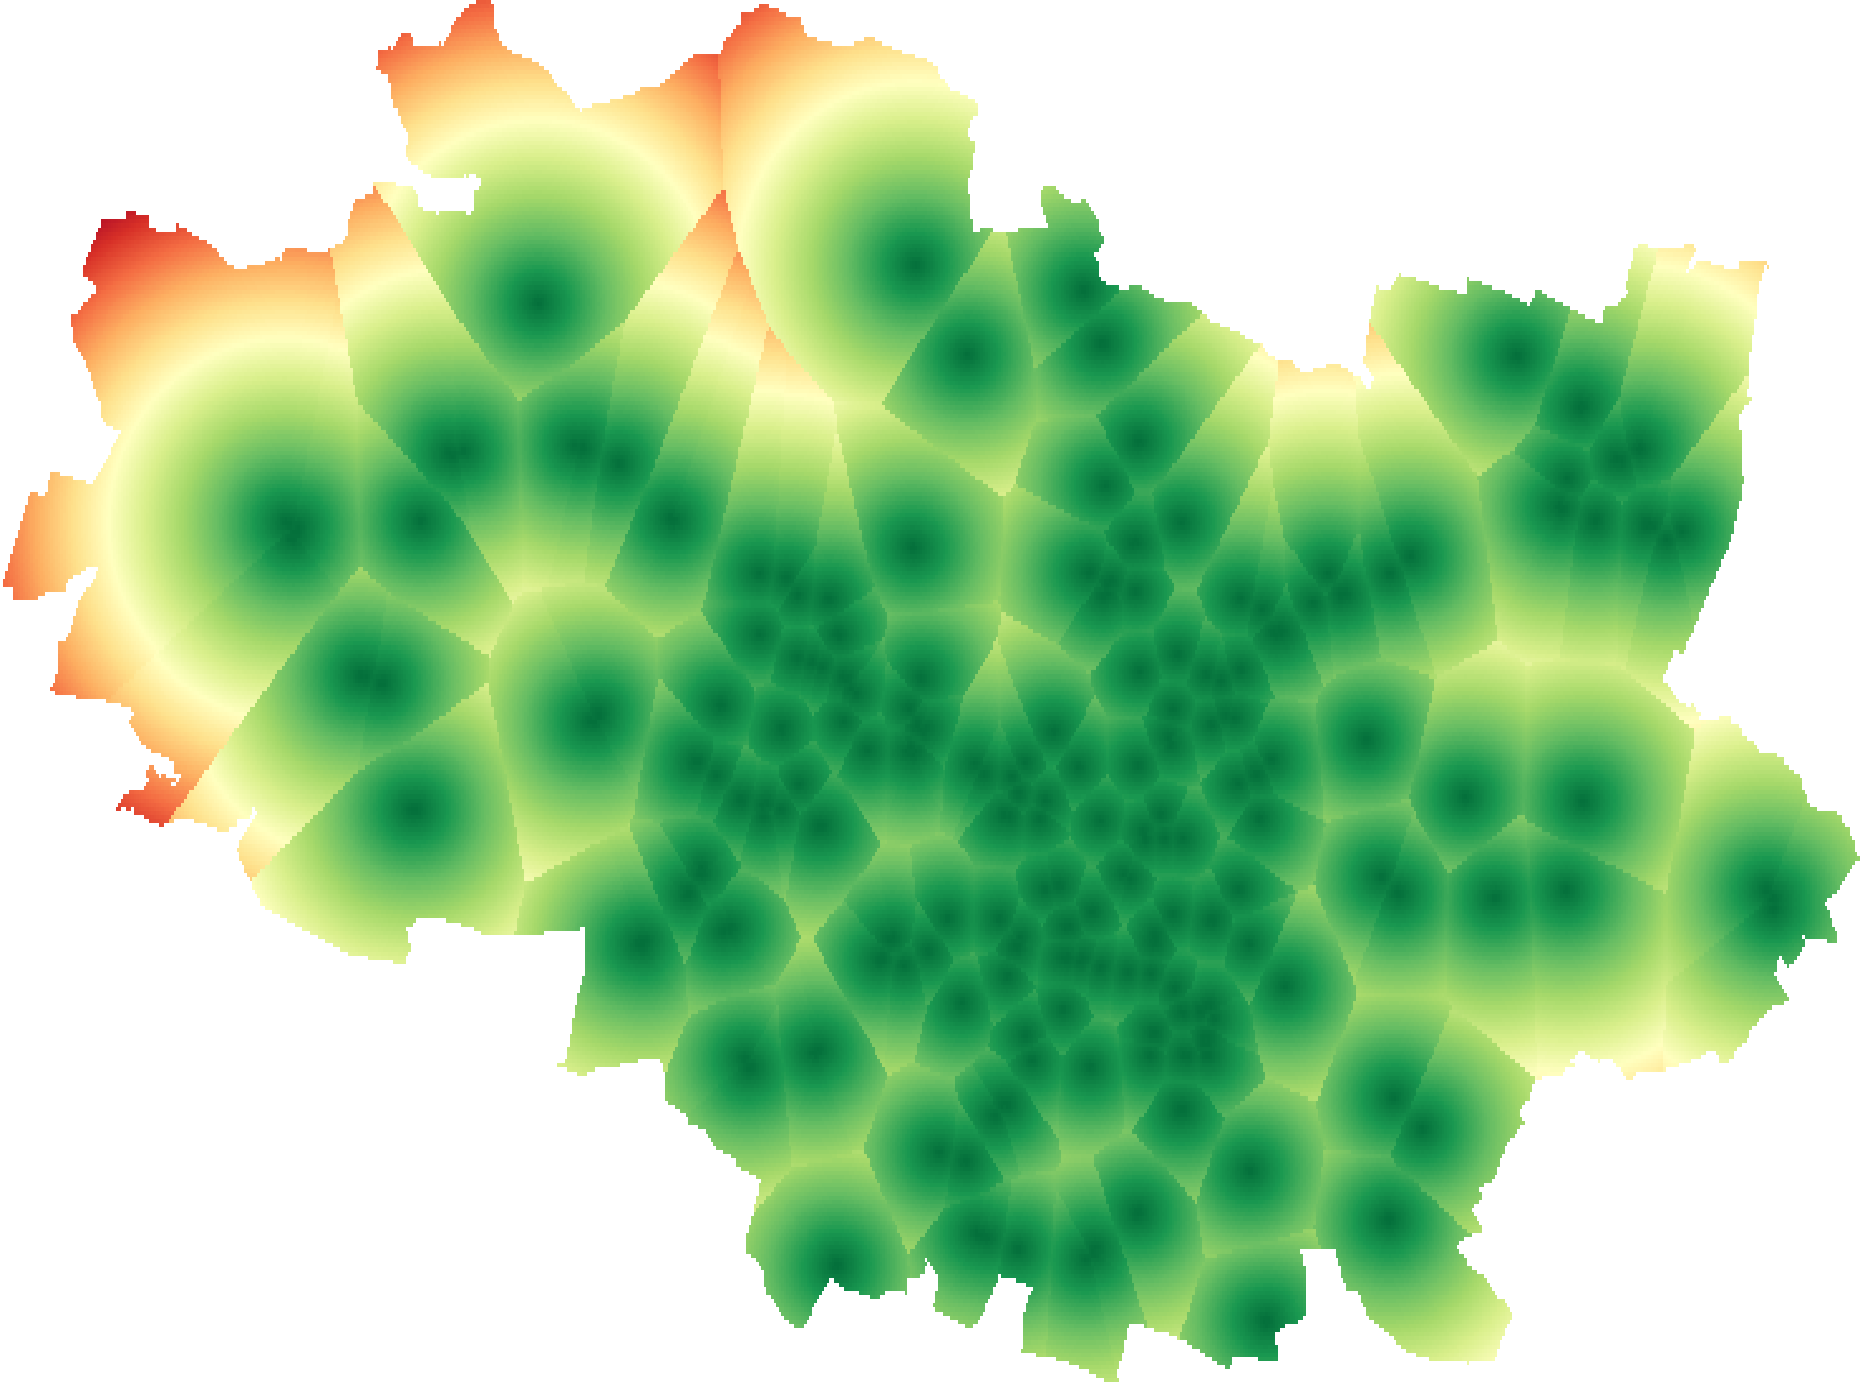
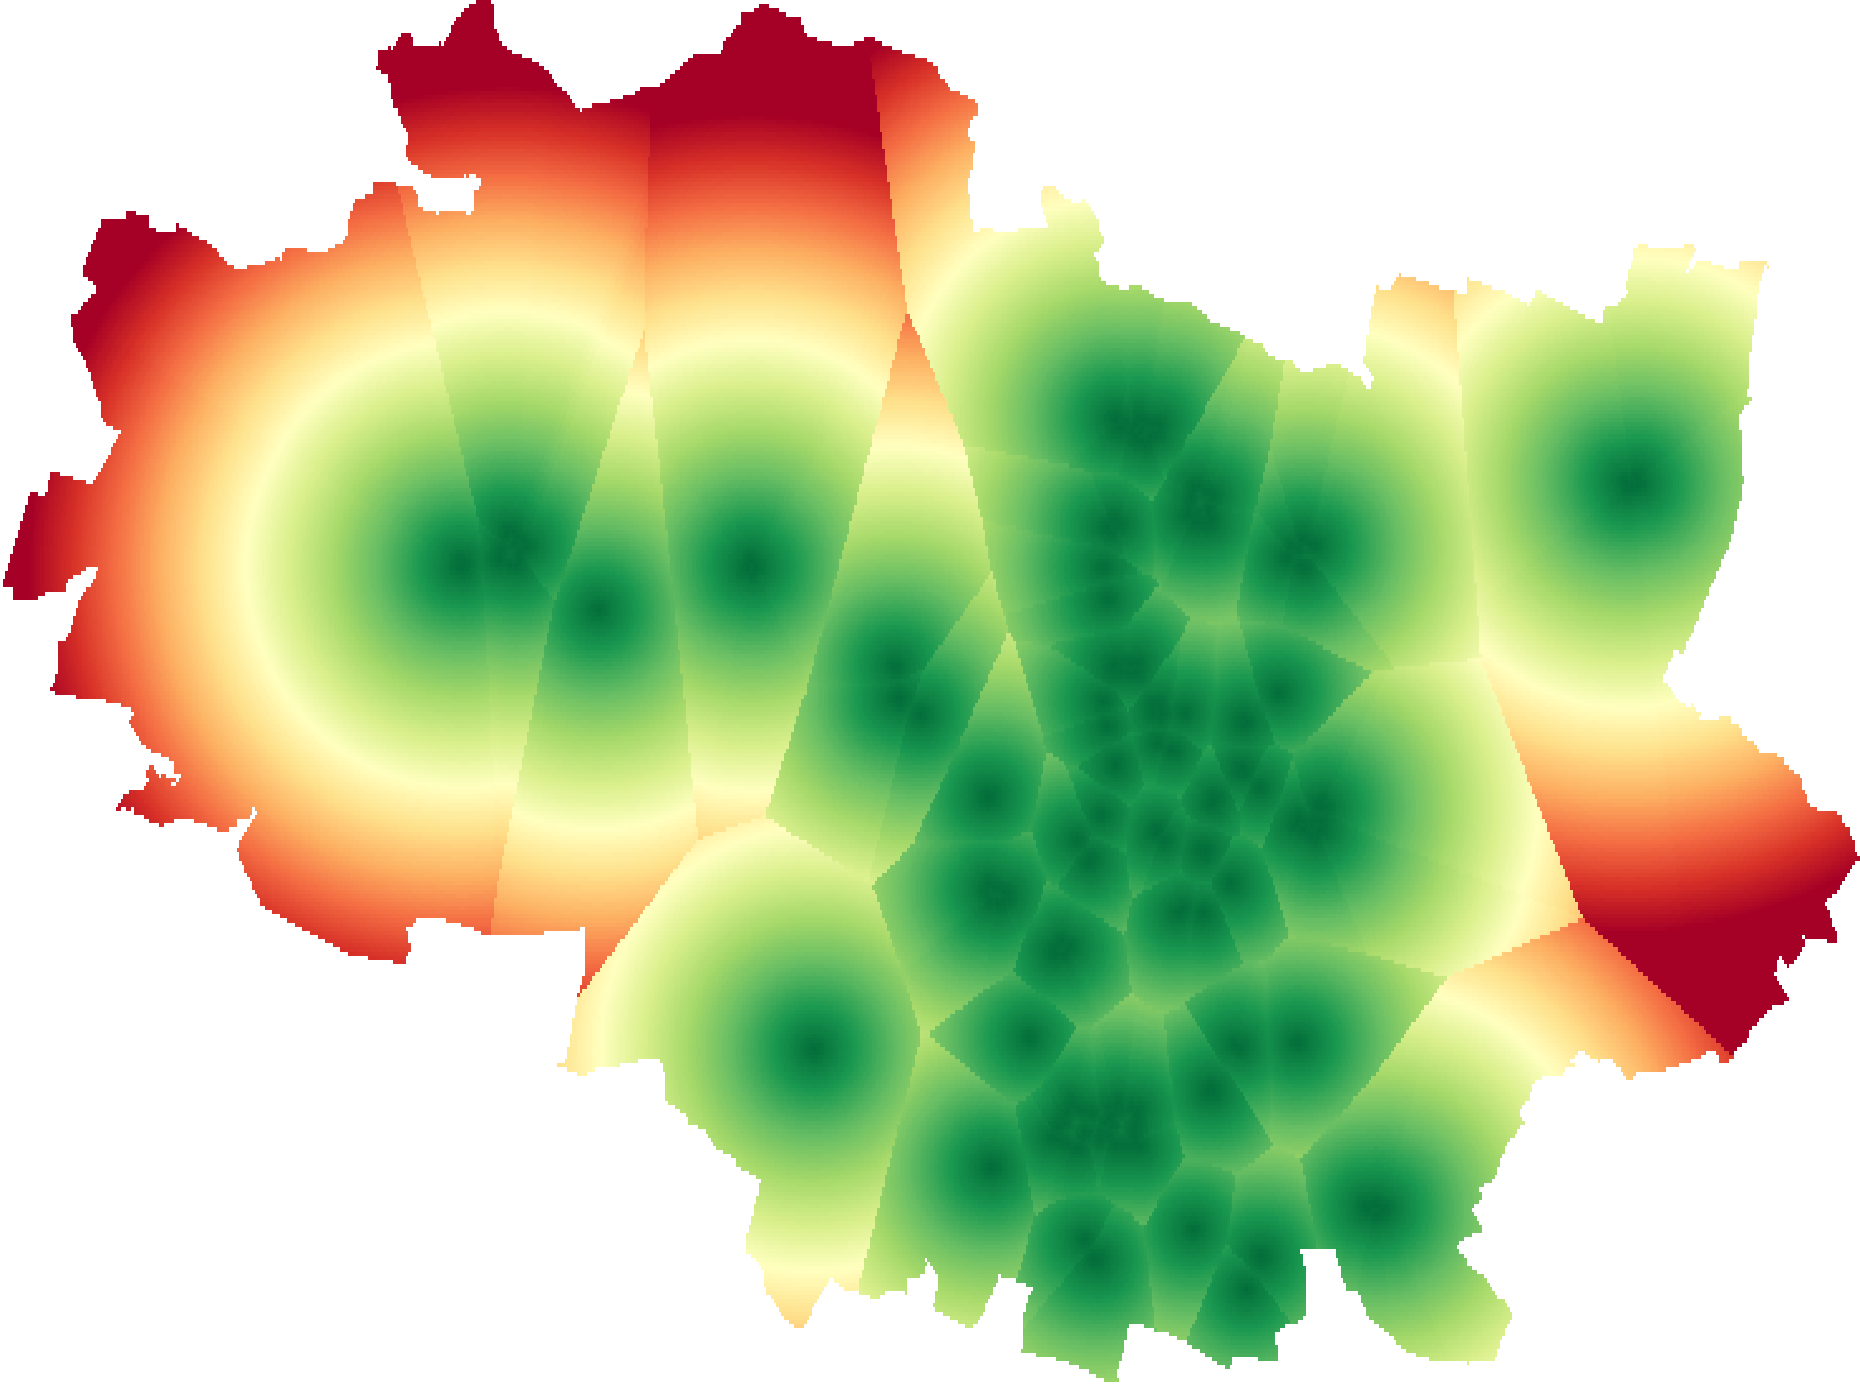
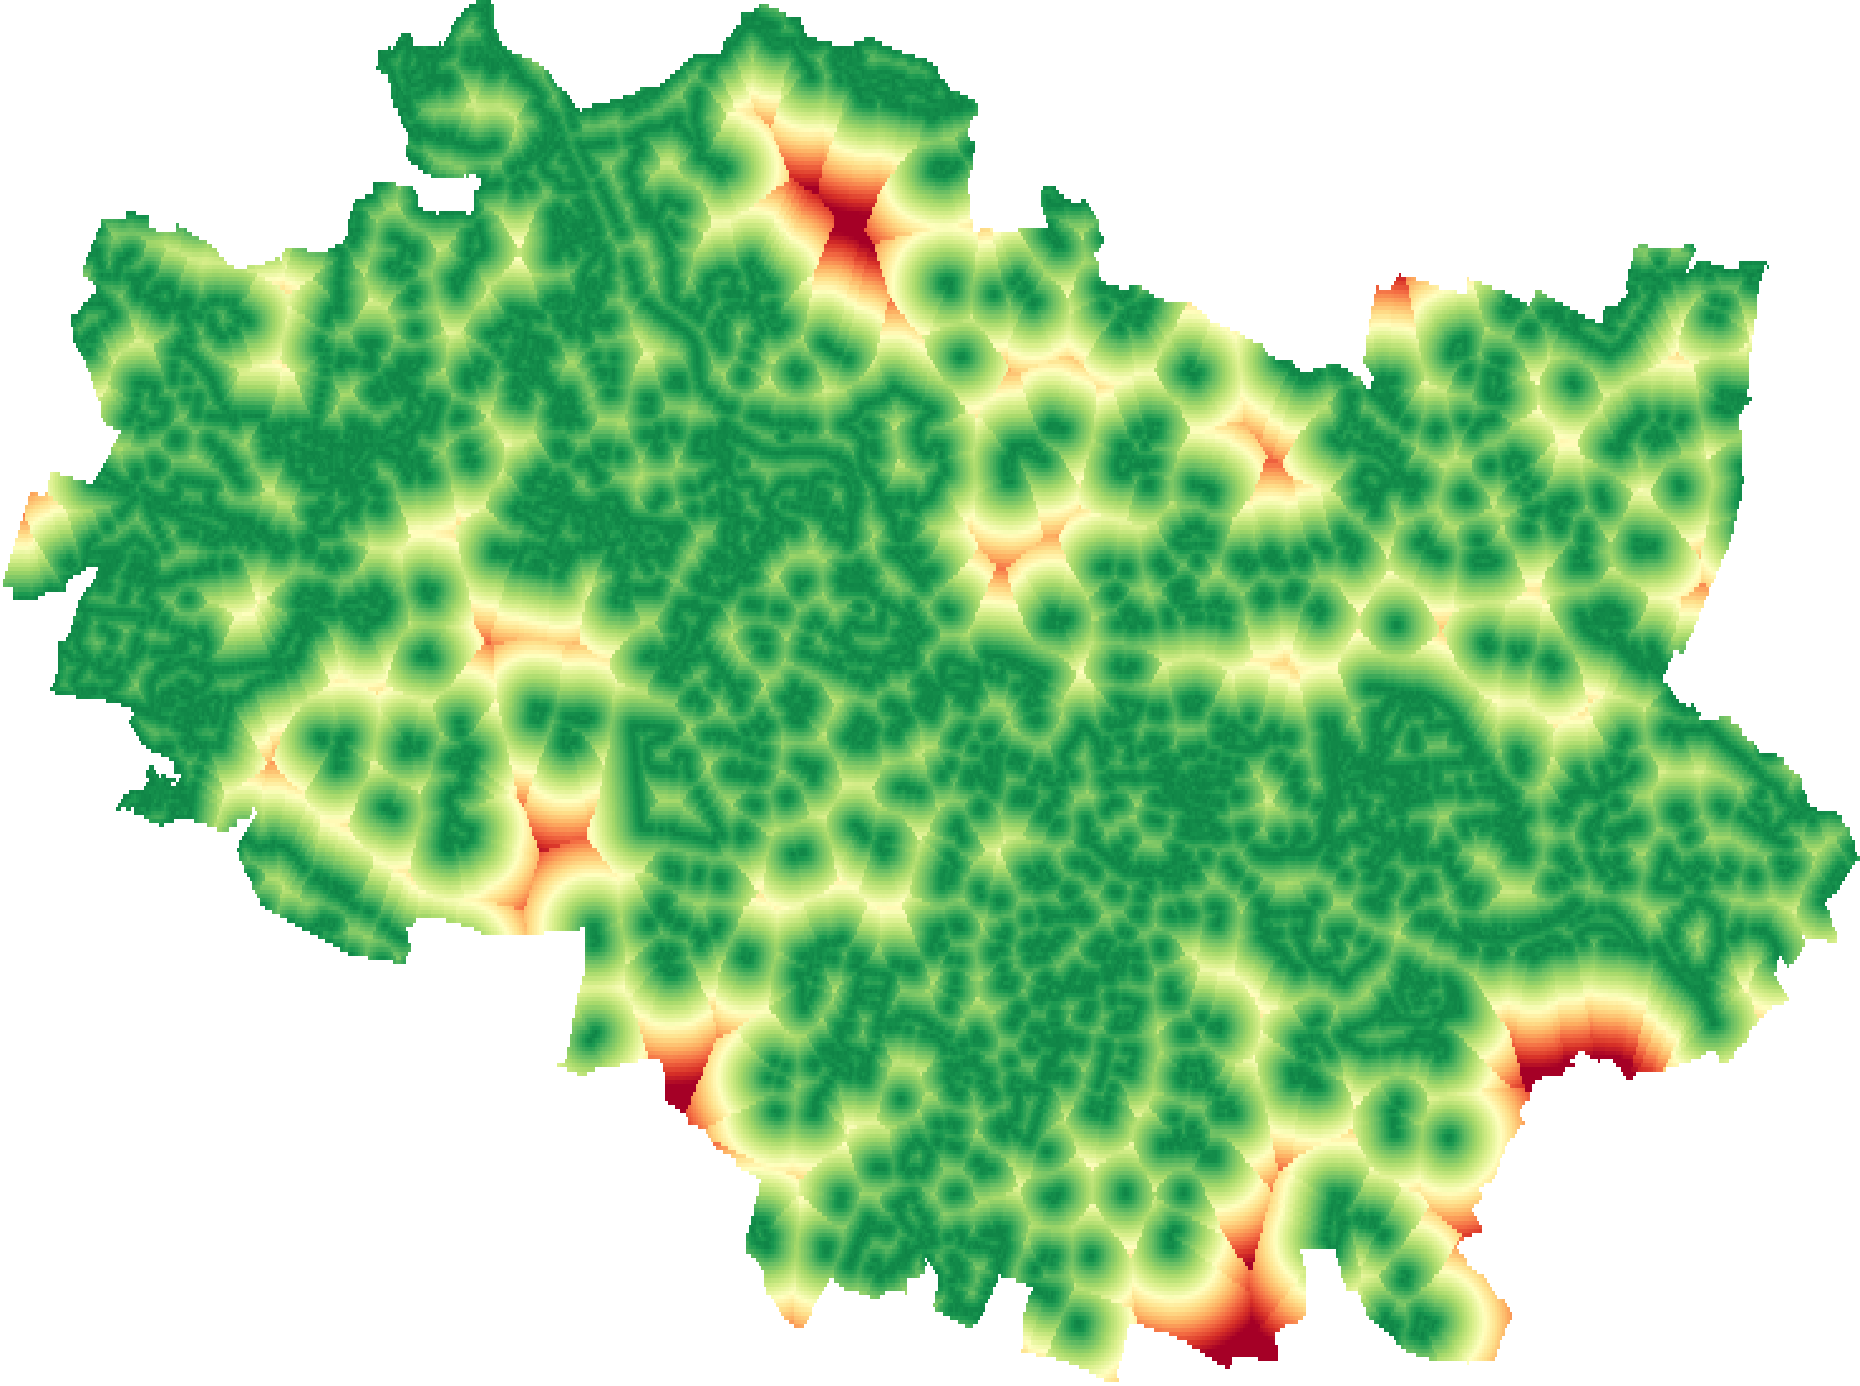

In [32]:
# Tworzenie mapy
city_map = folium.Map(location=[(min_lat + max_lat) / 2, (min_lon + max_lon) / 2], zoom_start=12)

# Dodanie pierwszej mapy cieplnej
heatmap1 = raster_layers.ImageOverlay(
    image="heatmap_station.png",
    bounds=[[min_lat, min_lon], [max_lat, max_lon]],
    opacity=0.5,  # Przezroczystość pierwszej warstwy
    interactive=True  # Opcja umożliwiająca interakcję
)
heatmap1.add_to(city_map)

# Dodanie drugiej mapy cieplnej
heatmap2 = raster_layers.ImageOverlay(
    image="heatmap_shop.png",
    bounds=[[min_lat, min_lon], [max_lat, max_lon]],
    opacity=0.5,  # Przezroczystość drugiej warstwy
    interactive=True
)
heatmap2.add_to(city_map)

heatmap3 = raster_layers.ImageOverlay(
    image="heatmap_hospital.png",
    bounds=[[min_lat, min_lon], [max_lat, max_lon]],
    opacity=0.5,
    interactive=True
)
heatmap3.add_to(city_map)

heatmap4 = raster_layers.ImageOverlay(
    image="heatmap_park.png",
    bounds=[[min_lat, min_lon], [max_lat, max_lon]],
    opacity=0.5,
    interactive=True
)
heatmap4.add_to(city_map)

# Dodanie warstwy kontrolnej, aby użytkownik mógł włączać i wyłączać warstwy
folium.LayerControl().add_to(city_map)

# Wyświetlanie mapy
city_map
